# Loading data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [2]:
path = "GTDdownload/"

print(os.listdir(path))

['Codebook.pdf', 'globalterrorismdb_0718.gdb', 'globalterrorismdb_0718dist.xlsx', 'GTD Distribution letter 2018.pdf', 'GTD EULA 2018.pdf', 'gtd1993_0718dist.xlsx', 'gtd_14to17_0718dist.xlsx', 'gtd_70to95_0718dist.xlsx', 'gtd_96to13_0718dist.xlsx', 'Nigeria.csv']


In [3]:
def loadGTD(filename):
    link = 'GTDdownload/'+filename
    file = pd.read_excel(link)
    return file

In [4]:
# loading complete dataset to memory (can take a while due to huge file size)
data = loadGTD("globalterrorismdb_0718dist.xlsx")


# Some descriptive analysis

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# subsetting worldwide dataset by countryname

def subsetGTDbyCountry(data, countryname):
    GTDcountry = data[data.country_txt == countryname]
    return GTDcountry

In [7]:
GTDNigeria = subsetGTDbyCountry(data, "Nigeria")

In [8]:
GTDNigeria.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
3594,197602130003,1976,2,13,NaN,0,NaT,147,Nigeria,11,...,"The victims included Sergeant Adamu Michika, S...","Segun Akande, ""42 years ago, one of Nigeria's ...","""Anniversary: Motoring Error that Led to the K...",NaN,UMD Miscellaneous,-9,-9,0,-9,NaN
10026,198001170007,1980,1,17,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,1,1,1,1,NaN
20222,198311110001,1983,11,11,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
20350,198311270001,1983,11,27,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
20362,198311290002,1983,11,29,NaN,0,NaT,147,Nigeria,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [9]:
GTDNigeria.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [10]:
GTDNigeria.shape

(3907, 135)

# Saving (loading) Nigeria data to (from) disk

In [11]:
def saveGTDdata(data, countryname):
    # save data by countryname
    data.to_csv("GTDdownload/"+countryname+".csv")

In [12]:
saveGTDdata(GTDNigeria, "Nigeria")
# reduced filesize to approx. 5 MB

In [13]:
def loadGTDdata(countryname):
    # load data by countryname
    data = pd.read_csv("GTDdownload/"+countryname+".csv")
    return data

In [14]:
GTDNigeria = loadGTDdata("Nigeria")

# Plots

In [15]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [16]:
toplot = GTDNigeria.gname.value_counts()

In [17]:
toplot.head()

Boko Haram                                                 2087
Unknown                                                    1045
Fulani extremists                                           498
Movement for the Emancipation of the Niger Delta (MEND)      85
Niger Delta Avengers (NDA)                                   50
Name: gname, dtype: int64

In [18]:
# Taking only the groups with 50 or more attacks since 1970
toplot = toplot[toplot >= 50]

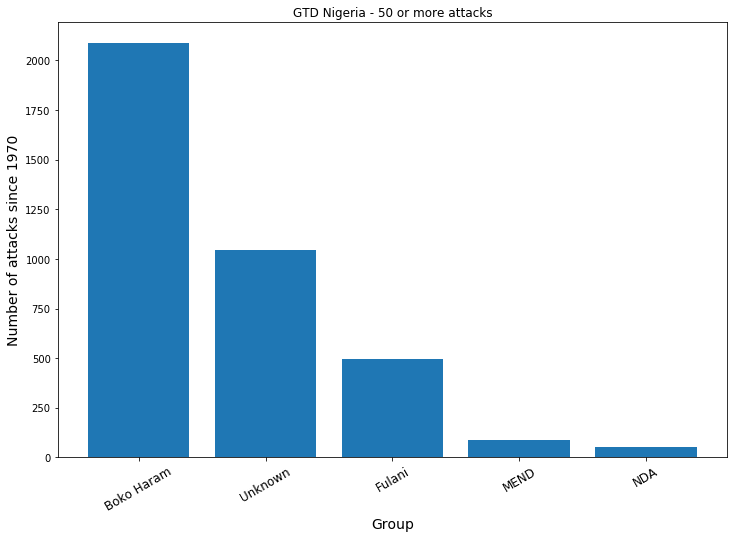

In [19]:
index = np.arange(len(toplot))
plt.bar(index, toplot)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Number of attacks since 1970', fontsize=14)
plt.xticks(index, ["Boko Haram", "Unknown", "Fulani", "MEND", "NDA"], fontsize=12, rotation=30)
plt.title('GTD Nigeria - 50 or more attacks')
plt.show()

# Maps

In [20]:
# subset by Group

def subsetGTDbyGroup(data, groupname):
    GTDgroup = data[data.gname == groupname]
    return GTDgroup

In [21]:
GTDNigeriaBokoHaram = subsetGTDbyGroup(GTDNigeria, "Boko Haram")
GTDNigeriaFulani = subsetGTDbyGroup(GTDNigeria, "Fulani extremists")
GTDNigeriaUnknown = subsetGTDbyGroup(GTDNigeria, "Unknown")

In [22]:
def CreatMapbyGroup(groupdata):
    
    Geodata = groupdata[["longitude", "latitude"]].copy()
    Geodata = Geodata.dropna()
    
    folium_loc = [8.675277, 9.081999]
    map = folium.Map(location = folium_loc, zoom_start = 6)
    
    for row in Geodata.iterrows():
        row_values = row[1] 
        location = [row_values['latitude'], row_values['longitude']] # folium takes first lat then longitude
        marker = folium.Marker(location = location)
        marker.add_to(map)
    return map

In [23]:
BokoMap = CreatMapbyGroup(GTDNigeriaBokoHaram)
FulaniMap = CreatMapbyGroup(GTDNigeriaFulani)
UnknownMap = CreatMapbyGroup(GTDNigeriaUnknown)

In [24]:
# Boko Haram has a clear center of activities in the northeast of Nigeria

In [25]:
display(BokoMap)

In [26]:
# Fulani extremsists have a clear center of activities in the center from north to south of Nigeria

In [27]:
display(FulaniMap)

In [28]:
# Uknown terror attacks are distributed all over the country, 
# but have an emphasis in the south (oil industry as target?)

In [29]:
display(UnknownMap)